In [0]:
# Fill in your name using the format below and student ID number
your_name = "Hoogeveen, Dim"
student_id = "1518496"

In [0]:
# Before submission, set this to True so that you can render and verify this notebook without training deep learning models.
# Any deep learning models will be trained from file instead.
stop_training = True

In [0]:
# Uncomment the following line to run in Google Colab
!pip install --quiet openml 

In [0]:
# Uncomment the following line to run in Google Colab
%tensorflow_version 2.x
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU') # Check whether GPUs are available

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [0]:
%matplotlib inline
import openml as oml
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [0]:
from packaging import version
import sklearn
import tensorflow
sklearn_version = sklearn.__version__
tensorflow_version = tensorflow.__version__
if version.parse(sklearn_version) < version.parse("0.22.0"):
    print("scikit-learn is outdated. Please update now!")
if version.parse(tensorflow_version) < version.parse("2.1.0"):
    print("Tensorflow is outdated. This is version {}. Please update to 2.1.".format(tensorflow_version))
else:
    print("Hi{}, Looks good. You may continue :)".format(your_name.split(",")[1]))

Hi Dim, Looks good. You may continue :)


# Assignment 3

### Choice of libraries
We recommend to use Tensorflow in this assignment since that is what we covered in the labs. If you feel confident using PyTorch (and Skorch for the scikit-learn wrapper), that is allowed too, as long as you are able to implement the requested functions and return the requested data. Read the assignment carefully and ensure that you can. Note that you may also need to do a bit more work to implement certain helper functions and wrappers.

### Storing and submitting files
You must be able to store your models and submit them to GitHub Classroom. The evaluation functions used in this notebook will automatically store models for you.

If you want to run and solve the notebook on your local machine/laptop, fill in the path 'base_dir' to your assignment folder into the next cell.

If you use Colab, we recommend that you link it to your Google Drive:  
* Upload the assignment folder to your Google Drive (+ New > Folder Upload)
* Open Colab in a browser, open the 'Files' menu in the left sidebar, and click 'Mount Drive'
  * At this point you may need to authenticate
* Fill in the path to your assignment folder below
  * It's likely '/content/drive/My Drive/assignment-3-yourname'

In [0]:
base_dir = '/content/drive/My Drive/Colab Notebooks/assignment3-ml' # For Google Colab
# base_dir = './'

In [0]:
#Uncomment to link Colab notebook to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Using GPUs
While you can solve this assignment on a CPU, using a GPU will speed things up training quite a bit. If you have a local GPU, you can use that. If you don't, we recommend Google Colab. When you are in Colab:
* In Runtime > Change runtime type, select the GPU under Hardware Accelerator
* Run the 3rd cell on the top of this notebook to check that the GPU is found.

Note that Colab may not always have GPUs ready all the time, and may deny you a GPU when you have used them a lot. When you are temporarily 'locked out', you can switch to a non-GPU runtime or to a local instance of Jupyter running on your machine.

### Constraints
* Your stored models should not be larger than 100MB when stored in file. GitHub will not allow uploading if they are.
* When questions ask you to provide an explanation, it should be less than 500
characters long. Some questions have a higher limit. Always answer in full sentences.
* Don't train for more than 100 epochs, i.e. don't throw excessing computational resources at the problem. If your model hasn't converged by then, think of ways it could be made to converge faster. In this assignment you are not after the last tiny improvement, you can stop when learning curves flatten out. Do at least 5 epochs to get a reasonable learning curve.

### Grading
Grading is based on the following aspects:
* Correctness in answering the question. Carefully read the question and answer
what is asked for. Train your models on the correct data. It should be clear on which data should be trained, but ask when in doubt. When something is not defined (e.g. the number of epochs or batch size), you can freely choose them.
* Clarity of your explanations. Write short but precise descriptions of what you did and why. Give short but clear explanations of the observed performance. 
After your explanation, your approach and model should make perfect sense. Refrain from using symbols as substitute for words in your explanation (e.g. no: "More layers -> more parameters" yes: "More layers mean more parameters"). 
* Part of your grade depends on how well your model performs. When the question says 'you should at least get x%', x% will give you a good but not the maximal grade. You can get the full grade when you are close to what is the expected maximal performance. You don't need to invest lots of effort into the last tiny improvement, though. Unless specified, we look at the accuracy on the validation set. If your learning curves are very erratic we'll compute a score based on the smoothed curves (i.e. single peaks don't count).
* The weight of each question is indicated. Take this into account when planning your time.

### Other tips
* Don't wait until the last minute to do the assignment. The models take time to train, most questions will require some thinking, and some require you to read up on some new concepts.
* Take care that you upload the results as requested. You need to submit not only the notebooks but also the trained models and learning curves (training histories). Be sure to run the verification script and check that all the results are included.
* We provide an evaluation function that also stored models to disk. After you are done training the model, set the 'train' attribute to False so that the model doesn't train again (and loads from file instead) when you restart and rerun your notebook.
* Explore. For many questions we'll ask you to explain your model design decisions. You cannot magically know the best solutions but you can experiment
based on your understanding and make decisions based on both your knowledge and experiments. Your explanation is at least as important as the performance of your model.
* Be original. We will check for plagiarism between student submissions.

### Data
The [Street View House Numbers Dataset](https://www.openml.org/d/41081) contains 32-by-32 RGB images centered around a single digit of a house number appearing in Google Street View. Many of the images do contain some distractors at the sides. It consists of 10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10. Your goal is to build models that recognize the correct digit.

If you use Colab, uncomment the following to cache the dataset inside the VM. This will make reloading faster if you need to restart your notebook. After longer periods of inactivity, your VM may be recycled and the cache lost, in which case the dataset will be downloaded again. Also note that this dataset is about 1Gb large, and will take even more space in memory. You may need to switch to a high-RAM environment (Colab will ask you if you hit the limit).

In [0]:
# Use OpenML caching in Colab
# On your local machine, it will store data in a hidden folder '~/.openml'
import os
oml.config.cache_directory = os.path.expanduser('/content/cache')

In [0]:
# Download Streetview data. Takes a while (several minutes), and quite a bit of
# memory when it needs to download. After caching it loads faster.
SVHN = oml.datasets.get_dataset(41081)
X, y, _, _ = SVHN.get_data(dataset_format='array',
    target=SVHN.default_target_attribute)

Reshape, sample and split the data

In [0]:
from tensorflow.keras.utils import to_categorical

Xr = X.reshape((len(X),32,32,3))
Xr = Xr / 255.
yr = to_categorical(y)

In [0]:
# DO NOT EDIT. DO NOT OVERWRITE THESE VARIABLES.
from sklearn.model_selection import train_test_split
# We do an 80-20 split for the training and test set, and then again a 80-20 split into training and validation data
X_train_all, X_test, y_train_all, y_test = train_test_split(Xr,yr, stratify=yr, train_size=0.8, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_all,y_train_all, stratify=y_train_all, train_size=0.8, random_state=1)
evaluation_split = X_train, X_val, y_train, y_val

Check the formatting - and what the data looks like

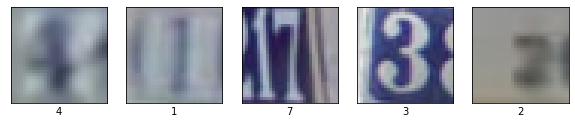

In [0]:
from random import randint

# Takes a list of row ids, and plots the corresponding images
# Use grayscale=True for plotting grayscale images
def plot_images(X, y, grayscale=False):
    fig, axes = plt.subplots(1, len(X),  figsize=(10, 5))
    for n in range(len(X)):
        if grayscale:
            axes[n].imshow(X[n], cmap='gray')
        else:
            axes[n].imshow(X[n])
        axes[n].set_xlabel((np.argmax(y[n])+1)%10) # Label is index+1
        axes[n].set_xticks(()), axes[n].set_yticks(())
    plt.show();

images = [randint(0,len(X_train)) for i in range(5)]
X_random = [X_train[i] for i in images]
y_random = [y_train[i] for i in images]
plot_images(X_random, y_random)

### Evaluation harness
We provide an evaluation function 'run_evaluation' that you should use to 
evaluate all your models. It also stores the trained models to disk so that
your submission can be quickly verified, as well as to avoid having to train
them over and over again. Your last run of the evaluation function (the last one
stored to file), is the one that will be evaluated. The 'train' argument indicates whether to train or to load from disk. We have provided helper functions for saving and loading models to/from file, assuming you use TensorFlow. If you use PyTorch you'll have to adapt them.

In [0]:
import os
import pickle
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model # for use with tensorflow

def shout(text, verbose=1):
    """ Prints text in red. Just for fun.
    """
    if verbose>0:
        print('\033[91m'+text+'\x1b[0m')

def load_model_from_file(base_dir, name, extension='.h5'):
    """ Loads a model from a file. The returned model must have a 'fit' and 'summary'
    function following the Keras API. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    base_dir -- Directory where the models are stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    try:
        model = load_model(os.path.join(base_dir, name+extension))
    except OSError:
        shout("Saved model could not be found. Was it trained and stored correctly? Is the base_dir correct?")
        return False
    return model

def save_model_to_file(model, base_dir, name, extension='.h5'):
    """ Saves a model to file. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    model -- the model to be saved
    base_dir -- Directory where the models should be stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    model.save(os.path.join(base_dir, name+extension))

# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

# DO NOT EDIT
def run_evaluation(name, model_builder, data, base_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, **kwargs):
    """ Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data in given as a generator or not
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        return
    if not hasattr(model, 'fit'):
        shout("Model is not built correctly")
        return
    learning_curves = {}
    if train and not stop_training: # Train anew
        shout("Training the model", verbose)
        if generator:
            generator, X_val, y_val = data
            history = model.fit(generator, epochs=epochs, batch_size=batch_size,
                              steps_per_epoch=steps_per_epoch, verbose=1, 
                              validation_data=(X_val, y_val))
            learning_curves = history.history
        else:
            X_train, X_val, y_train, y_val = data
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                              verbose=1, validation_data=(X_val, y_val))
            learning_curves = history.history
        shout("Saving to file", verbose)
        save_model_to_file(model, base_dir, name)
        with open(os.path.join(base_dir, name+'.p'), 'wb') as file_pi:
            pickle.dump(learning_curves, file_pi)
        shout("Model stored in "+base_dir, verbose)
    else: # Load from file
        shout("Loading model from file", verbose)
        model = load_model_from_file(base_dir, name)
        if not model:
            shout("Model not found")
            return
        learning_curves = None
        try:
            learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
        except FileNotFoundError:
            shout("Learning curves not found")
            return
        shout("Success!", verbose)
    # Report
    print(model.summary())
    lc = pd.DataFrame(learning_curves)
    lc.plot(lw=2,style=['b:','r:','b-','r-']);
    plt.xlabel('epochs');
    print(lc.apply(minMax))

## Part 1. Dense networks (10 points)

### Question 1.1: Baseline model (4 points)
- Build a dense network (with only dense layers) of at least 3 layers that is shaped like a pyramid: The first layer must have many nodes, and every subsequent layer must have increasingly fewer nodes, e.g. half as many. Implement a function 'build_model_1_1' that returns this model.
- You can explore different settings, but don't use any preprocessing or regularization yet. You should be able to achieve at least 70% accuracy, but more is of course better. Unless otherwise stated, you can use accuracy as the evaluation metric in all questions.
* Add a small description of your design choices (max. 500 characters) in 'answer_q_1_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- The name of the model should be 'model_1_1'. Evaluate it using the 'run_evaluation' function. For this question, you should not use more than 50 epochs.

In [0]:
# Set epochs for Part 1 models
epochs = 40

In [0]:
# Define model here for Part 1
input_image_shape = 32 * 32 # use pixels of image
output_shape = 10           # amount of labels
n_hidden_layers = 8         

# factor is nth-root (from n_hidden_layers) of `input/output` factor
exponential_factor = (input_image_shape / output_shape) ** (1 / (n_hidden_layers * 0.85))  

# 0.7 * h and 0.8 work good i.c.m. 8 layers, batch_size 64 and SGD

n_nodes_hidden_layer = np.empty(n_hidden_layers, dtype=int)
for i in range(n_hidden_layers):
    n_nodes_hidden_layer[i] = np.ceil(output_shape * (exponential_factor ** (n_hidden_layers - i)))
    print("Nodes for hidden layer no. {}: {}".format(i+1, n_nodes_hidden_layer[i]))

# print(n_nodes_hidden_layer)

Nodes for hidden layer no. 1: 2318
Nodes for hidden layer no. 2: 1174
Nodes for hidden layer no. 3: 595
Nodes for hidden layer no. 4: 301
Nodes for hidden layer no. 5: 153
Nodes for hidden layer no. 6: 78
Nodes for hidden layer no. 7: 40
Nodes for hidden layer no. 8: 20
[2318 1174  595  301  153   78   40   20]


Loading model from file
Success!
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 3072)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 2318)              7123214   
_________________________________________________________________
dense_5 (Dense)              (None, 1174)              2722506   
_________________________________________________________________
dense_6 (Dense)              (None, 595)               699125    
_________________________________________________________________
dense_7 (Dense)              (None, 301)               179396    
_________________________________________________________________
dense_8 (Dense)              (None, 153)               46206     
_________________________________________________________________
dense_9 (Dense)      

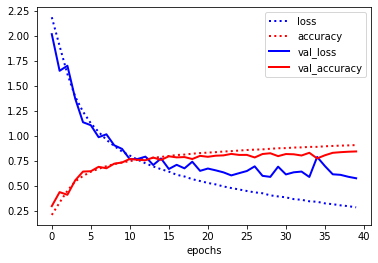

In [0]:
from tensorflow.keras import models
from tensorflow.keras import layers 
from tensorflow.keras.optimizers import SGD, Adam

def build_model_1_1():
    model = models.Sequential()
    model.add(layers.Reshape((3072,), input_shape=(32,32,3)))

    for i in range(n_hidden_layers):
        model.add(layers.Dense(n_nodes_hidden_layer[i], activation='relu'))    

    # model.add(layers.Dense(2048, activation='relu')) The next 4 for overfitting 89/84 with 40 epoch
    # model.add(layers.Dense(512, activation='relu'))
    # model.add(layers.Dense(128, activation='relu'))
    # model.add(layers.Dense(32, activation='relu'))

    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer = SGD(nesterov=True), 
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model
  
run_evaluation("model_1_1", build_model_1_1, evaluation_split, base_dir, 
               train=False, epochs=epochs, batch_size=64) # set train to True for testing



answer_q_1_1 = """
                Used a self-defined mathermetical formula to clearly define pyramid shape.
                Started with small (underfitting) then made bigger/more complex.
                Choice made to get overfitting model to later regularize.
                Different activations tried, but no significant differnce, therefore ReLu to compute faster.
                In the end high accuracies with 8 layers and many trainable parameters (10 million+), but trains quick enough.
               """
#    Tried optimizer (adam, sgd -> best (esp with categorical_crossentropy), rmsprop, Adadelta->very slow converging, ). 
#    Different loss (mse, categorical_crossentropy->best).
#    Tried different activations for first and second hidden layer (relu, sigmoid, tanh).
#    Besides that tried typing a lot different sizes for the layers.
#    Initially good results for 500, 300, 100 relu with SGD rate of 0.01-0.015. Adagrad follows perfect fit, however 10% less than SGD for 400-200-100

#     Tried to improve using formula for general approximation layers.
#     Adam works with very low learning rate, however it (together with rmsprop and adagrad converge very slow).

#     Bit overfitting, but that's fine; later regularize.
print("Answer is {} characters long".format(len(answer_q_1_1)))

In [0]:
# model_test = load_model_from_file(base_dir, "model_1_1")
# test_accuracy_1_1 = model_test.evaluate(X_test, y_test)[1]
# print(test_accuracy_1_1)

621/621 [==============================] - 3s 5ms/step - loss: 0.5648 - accuracy: 0.8391
0.8391076922416687


### Question 1.2: Preprocessing (2 points)
Rerun the model, but now preprocess the data first by converting the images to 
greyscale. You can use the helper function below. If you want to do additional 
preprocessing, you can do that here, too.
* Store the preprocessed data as a tuple `preprocessed_split`
* Rerun and re-evaluate your model using the preprocessed data.
  * For the remainder of the assignment, always use the preprocessed data
* Explain what you did and interpret the results in 'answer_q_1_2'. Is the model
  better, if so, why?

In [0]:
# Luminance-preserving RGB to greyscale conversion
def rgb2gray(X):
    return np.expand_dims(np.dot(X, [0.2990, 0.5870, 0.1140]), axis=3)

In [0]:
## Preprocessing
def preprocessing(X):
    return rgb2gray(X)
# Make grayscale using helper function
X_train_preproc = preprocessing(X_train)
X_val_preproc = preprocessing(X_val)

# Replace with the preprocessed data
preprocessed_split = X_train_preproc, X_val_preproc, y_train, y_val

Loading model from file
Success!
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 1024)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 2318)              2375950   
_________________________________________________________________
dense_10 (Dense)             (None, 1174)              2722506   
_________________________________________________________________
dense_11 (Dense)             (None, 595)               699125    
_________________________________________________________________
dense_12 (Dense)             (None, 301)               179396    
_________________________________________________________________
dense_13 (Dense)             (None, 153)               46206     
_________________________________________________________________
dense_14 (Dense)     

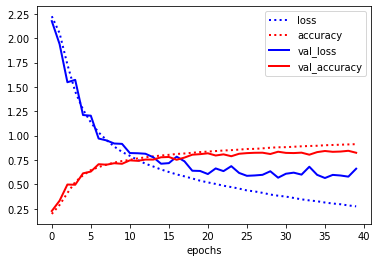

In [0]:
# Adjusted model
def build_model_1_2():
    model = models.Sequential()
    model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
    for i in range(n_hidden_layers):
            model.add(layers.Dense(n_nodes_hidden_layer[i], activation='relu'))   
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer= SGD(nesterov=True),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

# Evaluate. Use a new name 'model_1_2' to not overwrite the previous trained model
run_evaluation("model_1_2", build_model_1_2, preprocessed_split, base_dir, 
               train=False, generator=False, epochs=epochs, batch_size=64)


In [0]:
answer_q_1_2 = """
               Near-equal accuracy after preprocessing (only rgb2gray).
               The training and validation losses represent accuracies different than in 1.1;
               for max validation accuracies there is 0.16 difference in loss, while the accuracy is roughly equal.
               Furthermore the trainable params. went down from 10 to 6 million.
               Model is faster to train therefore, which is a benefit over 1.1.
               
               """
print("Answer is {} characters long".format(len(answer_q_1_2)))

Answer is 475 characters long


### Question 1.3: Regularization and tuning (4 points)
* Regularize the model. You can explore (and combine) different techniques. What works best?
* Tune other hyperparameters (e.g. learning rate, batch size,...) as you see fit.
* Explain your findings and final design decisions. Retrain the model again on the preprocessed data and discuss the results.
* Return your model in function 'build_model_1_3' and write your answer in 'answer_q_1_3'

Training the model
Epoch 1/40
1986/1986 [==============================] - 12s 6ms/step - loss: 2.1172 - accuracy: 0.2166 - val_loss: 1.9983 - val_accuracy: 0.2365
Epoch 2/40
1986/1986 [==============================] - 11s 6ms/step - loss: 1.9130 - accuracy: 0.2847 - val_loss: 1.8848 - val_accuracy: 0.3299
Epoch 3/40
1986/1986 [==============================] - 11s 6ms/step - loss: 1.7761 - accuracy: 0.3579 - val_loss: 1.7195 - val_accuracy: 0.3823
Epoch 4/40
1986/1986 [==============================] - 11s 6ms/step - loss: 1.6197 - accuracy: 0.4326 - val_loss: 1.4572 - val_accuracy: 0.5080
Epoch 5/40
1986/1986 [==============================] - 11s 6ms/step - loss: 1.3893 - accuracy: 0.5406 - val_loss: 1.3079 - val_accuracy: 0.5685
Epoch 6/40
1986/1986 [==============================] - 11s 6ms/step - loss: 1.2657 - accuracy: 0.5988 - val_loss: 1.1815 - val_accuracy: 0.6284
Epoch 7/40
1986/1986 [==============================] - 11s 6ms/step - loss: 1.1823 - accuracy: 0.6370 - val_lo

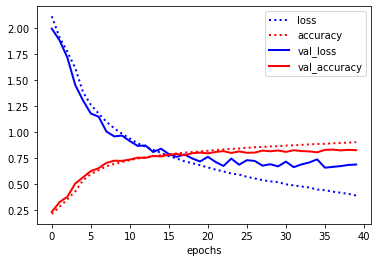

In [0]:
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD, Adam

def build_model_1_3():
    model = models.Sequential()
    model.add(layers.Reshape((1024,), input_shape=(32,32,1)))

    for i in range(n_hidden_layers):
        if i == (n_hidden_layers - 4):
            model.add(layers.Dropout(0.1))
        elif i == (n_hidden_layers - 3):
            model.add(layers.Dropout(0.2))
        elif i == (n_hidden_layers - 2):
            model.add(layers.Dropout(0.4))
        
        model.add(layers.Dense(n_nodes_hidden_layer[i], activation='relu'
                            #   ,kernel_regularizer=regularizers.l1_l2(l1=2e-4, l2=1e-3)))
                              ,activity_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-3)))
                            #   ,bias_regularizer=regularizers.l2(0.8)))  


    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer= SGD(learning_rate=1e-2, momentum=0.9, nesterov=True, decay=1e-2/epochs),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

run_evaluation("model_1_3", build_model_1_3, preprocessed_split, base_dir, 
               train=False, epochs=epochs, batch_size=32 )


In [0]:
answer_q_1_3 = """
               Regularization gives less overfitting, however slower to train. 
               Increasing dropout rate between the layers to force the model to generalize more towards the end.
               Batch size is optimally medium for SGD (30-35). Momentum is used to prevent oscillations and decay is to get closer to optimum.
                End result keeps still overfitting though as adding too much regularizer weight fails to converge fast enough to higher accuracies.
               """
            #    Kernel regularizer is for the weights of the nodes inside a layer.
            #    Activity regularizer is for the output from the layer.
print("Answer is {} characters long".format(len(answer_q_1_3)))

Answer is 500 characters long


## Part 2. Convolutional neural networks (10 points)
### Question 2.1: Design a ConvNet (7 points)
- Build a sequential convolutional neural network. Try to achieve the best validation accuracy you can. You should be able to get at least 90% accuracy. You can use any depth, any combination of layers, and any kind of regularization and tuning. 
- Add a description of your design choices in 'answer_q_2_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- You are allowed **800** characters for this answer (but don’t ramble).
- The name of the model should be 'model_2_1'. Evaluate it using the 'run_evaluation' function and the preprocessed data.

Loading model from file
Success!
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        416       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        25120     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        25632     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_2 (Dropout)  

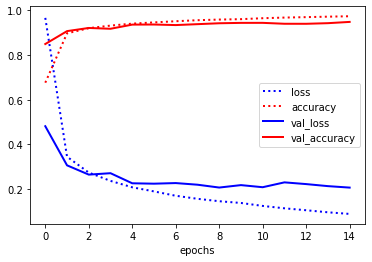

In [0]:
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense

def build_model_2_1():   
    model = models.Sequential()

    model.add(Conv2D(16, kernel_size=(5, 5), activation='relu', padding='same',
                     input_shape=(32, 32, 1)))
    model.add(BatchNormalization())

    model.add(Conv2D(32, (7, 7), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (5, 5), activation='relu', padding='same'))
    model.add(BatchNormalization())

    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))

    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model

run_evaluation("model_2_1", build_model_2_1, preprocessed_split, base_dir, 
               train=False, epochs=15, batch_size=128)


In [0]:
answer_q_2_1 = """
               Idea was to get high training accuracy (with possible overfit) and then regularize after using BatchNormalization and Dropout.
               To build deeper network it was better to have more layers than more filters.
               Thought behind subsequent conv2d layers (with the same filter size)  is 
               that the kernel size starts big and then becomes smaller to focus on details.
               After every conv2d layer there is some processing by either batchnormalization or maxpooling; this is to regularize and get less overfit.
               Small dense part following to convert output to corresponding label.
               Different optimizers tried, but those were less stable and reaching less accuracy.
               """ # Can use 800 characters here
            #    optimizers too (sgd, adam, rmsprop)
            #    More Conv2D seems to be the way to go to build deeper network. (instead of more filters per conv2D)
print("Answer is {} characters long".format(len(answer_q_2_1)))

Answer is 735 characters long


### Question 2.2: Data Augmentation (3 points)

- Augment the preprocessed training data. You can explore using image shifts, rotations, zooming, flips, etc. What works well, and what does not?
- Evaluate the model from question 2.1 with the augmented data using the 'run_evaluation' function. Store the new trained model as 'model_2_2'.
- Add a description of your design choices in 'answer_q_2_2': explain what you did and also why. Also discuss the performance of the model.

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    width_shift_range=[0, 16], # amount of pixels shift to right; 32 pixels present. Most left digit is actual label, so shift to right.
    # height_shift_range=0.1,
    # horizontal_flip=True,
    # preprocessing_function=preprocessing
    # rotation_range= 15,
    # zoom_range=0.2
    )

# Very good results (0.95 on val) with:
# train_datagen = ImageDataGenerator(
#     width_shift_range=[0, 16],
#     height_shift_range=0.1,
# )

it_train = train_datagen.flow(X_train_preproc, y_train, batch_size=128)

augmented_split = it_train, X_val_preproc, y_val

Loading model from file
Success!
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 16)        416       
_________________________________________________________________
batch_normalization_18 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 32, 32, 32)        25120     
_________________________________________________________________
batch_normalization_19 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 32, 32, 32)        25632     
_________________________________________________________________
batch_normalization_20 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_11 (Dropout)

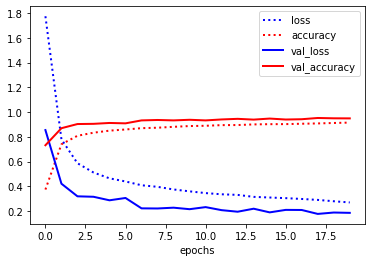

In [0]:
# Note that we build the same untrained model as in question 2.1 but store the 
# trained version as model_2_2. Change attributes as needed to run on augmented
# data

run_evaluation("model_2_2", build_model_2_1, augmented_split, base_dir, 
               train=False, generator=True, epochs=20, batch_size=None, steps_per_epoch=500)


In [0]:
answer_q_2_2 = """
            Get 0.7% improvement and no more overfitting. 
            Best results with small (widht and height) shift ranges as the images are quite low resolution and rotation or sheer will destroy too much information.
            Overall best result is with shifting images only to the right to force the model to focus on the leftmost digit.
            This focus on the leftmost digit was found after Q3.1. Iteratino was happening between 2.2 and 3.1 to improve model.
               """
print("Answer is {} characters long".format(len(answer_q_2_2)))

Answer is 493 characters long


## Part 3. Model interpretation (10 points)
### Question 3.1: Interpreting misclassifications (2 points)
Study which errors are still made by your last model (model_2_2) by evaluating it on the test data. You do not need to retrain the model.
* What is the accuracy of model_2_2 on the test data? Store this in 'test_accuracy_3_1'.
* Plot the confusion matrix in 'plot_confusion_matrix' and discuss which classes are often confused.
* Visualize the misclassifications in more depth by focusing on a single
class (e.g. the number '2') and analyse which kinds of mistakes are made for that class. For instance, are the errors related to the background, noisiness, etc.? Implement the visualization in 'plot_misclassifications'.
* Summarize your findings in 'answer_q_3_1'

In [0]:
model_2_2 = load_model_from_file(base_dir, "model_2_2")

In [0]:
test_accuracy_3_1 = model_2_2.evaluate(preprocessing(X_test), y_test)[1]
print(test_accuracy_3_1)

621/621 [==============================] - 2s 3ms/step - loss: 0.1905 - accuracy: 0.9512
0.9512035250663757


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


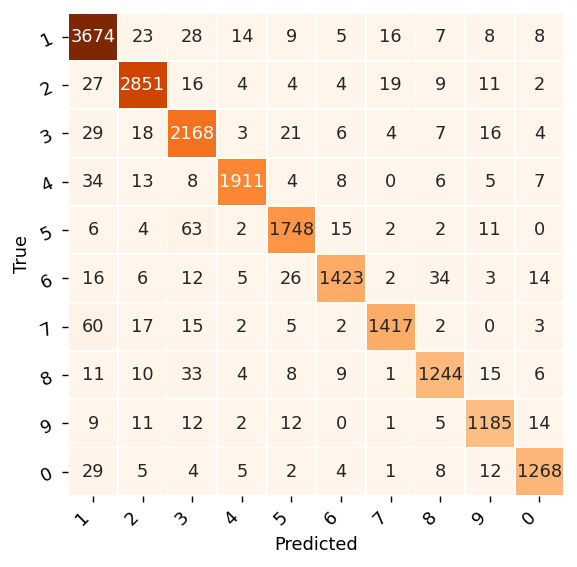

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

index_to_label = [1, 2, 3, 4, 5, 6, 7, 8, 9, 0]
y_test_int = np.argmax(y_test, axis=1)
y_pred = np.argmax(model_2_2.predict(preprocessing(X_test)), axis=1)

def plot_confusion_matrix():
    cm = confusion_matrix(y_test_int, y_pred)
    cm_df = pd.DataFrame(cm)
    
    plt.figure(figsize=(5, 5), dpi=128)
    heatmap = sns.heatmap(cm_df, cmap="Oranges", fmt='d',annot=True, linewidths=.5, linecolor='w', cbar=False)
    heatmap.xaxis.set_ticklabels(index_to_label, rotation=45, ha='right', fontsize=10)
    heatmap.yaxis.set_ticklabels(index_to_label, rotation=25, ha='right', fontsize=10)
    
    plt.ylabel('True')
    plt.xlabel('Predicted')

plot_confusion_matrix()

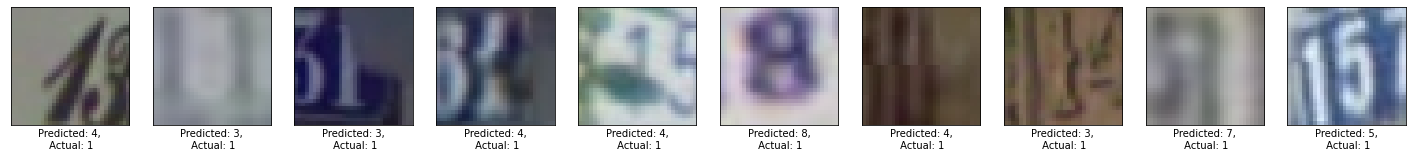

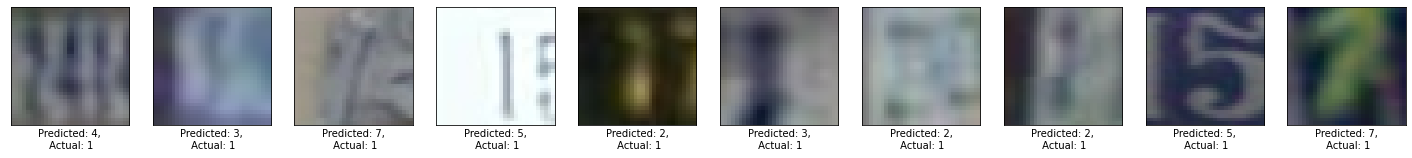

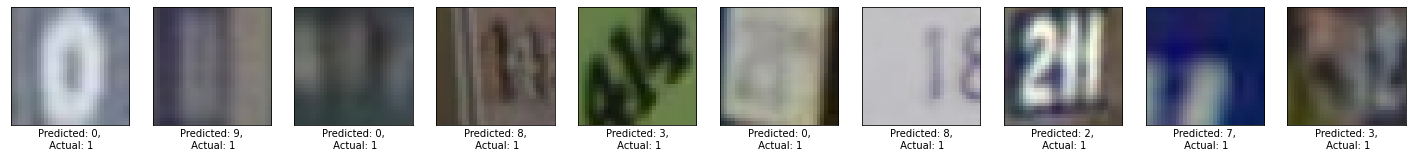

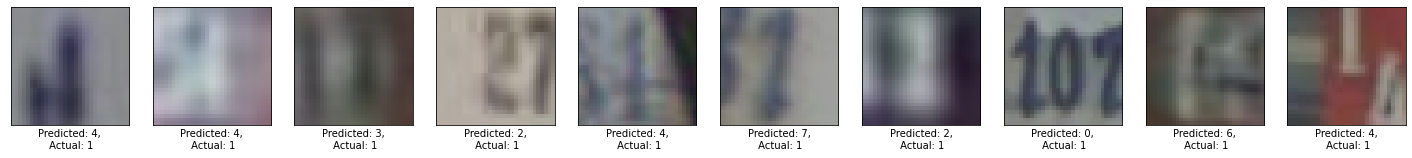

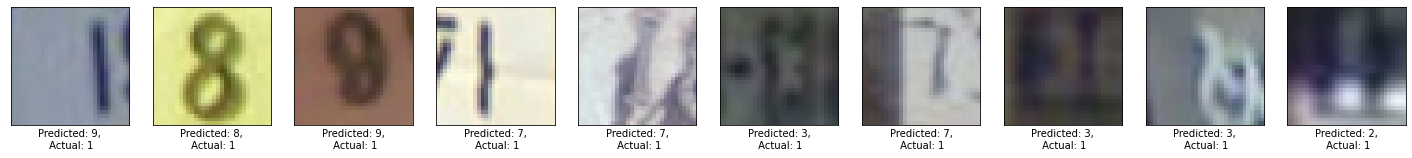

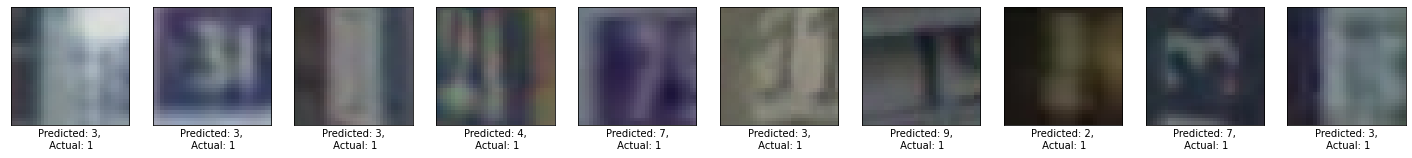

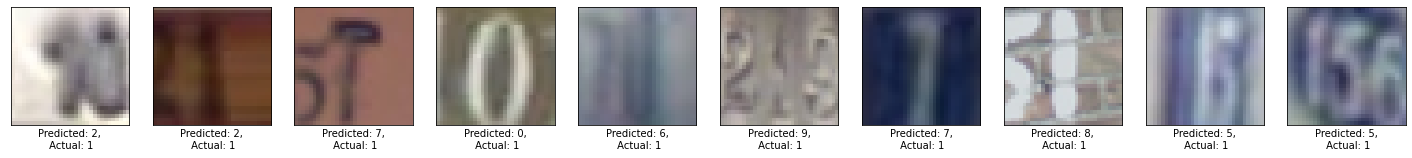

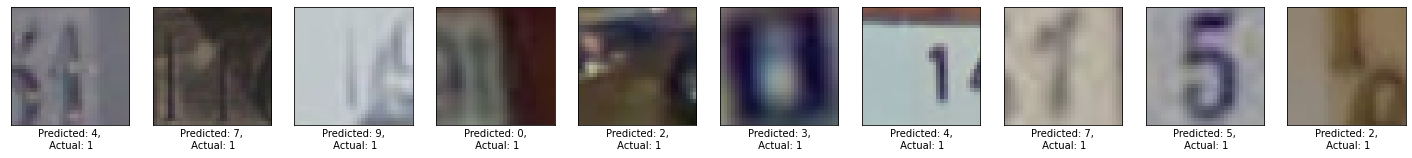

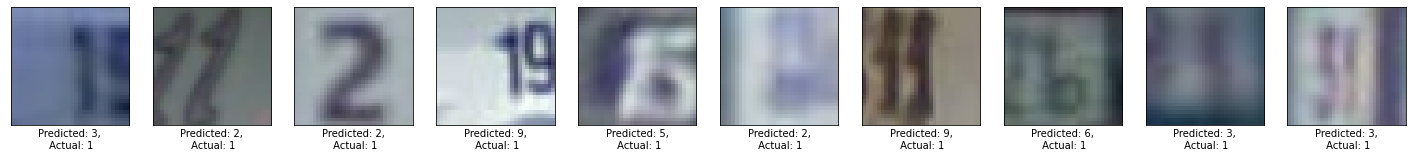

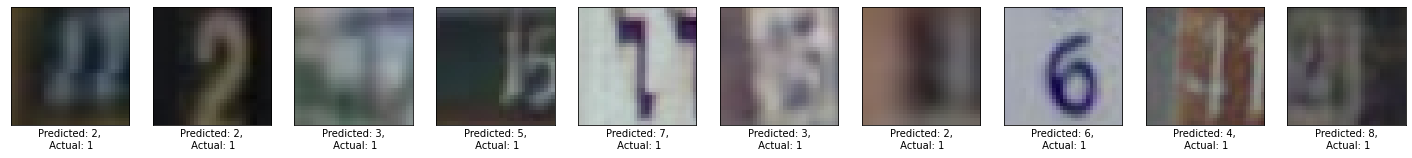

In [0]:

def plot_misclassifications():
    class_to_show_index= 0 # class 1
    horizontal_subplots = 10

    misclassified_samples = np.nonzero(np.logical_and(y_test_int != y_pred, y_test_int == class_to_show_index))[0]

    for i in  range(10):
        plot_row(misclassified_samples[i*10:i*10+10], horizontal_subplots)
    

def plot_row(indices_to_plot, horizontal_subplots):
    fig, axes = plt.subplots(1, horizontal_subplots, figsize=(25,25))
    
    for nr, i in enumerate(indices_to_plot):
            axes[nr].imshow(X_test[i])
            axes[nr].set_xlabel("Predicted: %s,\n Actual: %s" % ((y_pred[i]+1)%10, (y_test_int[i]+1)%10))
            axes[nr].set_xticks(()), axes[nr].set_yticks(())   

plot_misclassifications()

In [0]:
answer_q_3_1 = """
               Often a 7 is predicted to be a 1 and a 5 is often seen as a 3, which is to be expected from their shape.
               1 is more predicted in general as most samples are from this label, which also gives the most misclassifications.
               We therefore focus on 1 in misclassification.
               
               We see pictures with multiple numbers (e.g. 156; model predicts a 5, while label is 1).
               In some other cases there is a lot of noise (e.g. insanely blurry), which makes it even unreadable for me. 
               Lastly there are also multiple cases which seem to be incorrectly labeled; e.g. 2, 5 or 6 shown (and predicted), but 1 as label.

               The data is imperfect and requires cleaning, such as correct labeling.
               """ # can use 800 characters here
print("Answer is {} characters long".format(len(answer_q_3_1)))

Answer is 799 characters long


### Question 3.2: Visualizing activations (4 points)
* Implement a function `plot_activations()` that returns the most interesting activations (feature maps). Select the first example from the test set. Retrieve and visualize the activations of model 2_2 for that example (make sure you load that model in the function), for every filter for different convolutional layers (at different depths in the network).
* Give an explanation (as detailed as you can) about your observations in 'answer_q_3_2'. Is your model indeed learning something useful?

In [0]:
# This exercise expands upon Q3.1 and therefore also uses the model_2_2 variable.
# Uncomment next line if Q3.1 is not run beforehand:
# model_2_2 = load_model_from_file(base_dir, "model_2_2")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide


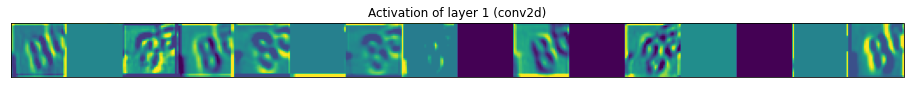

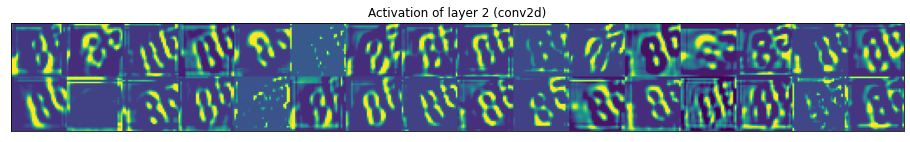

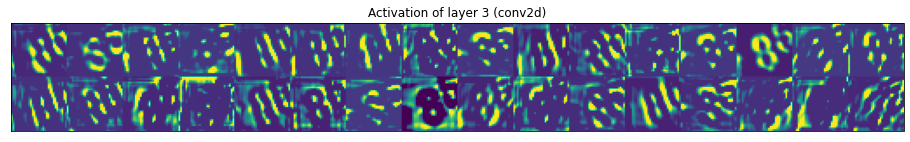

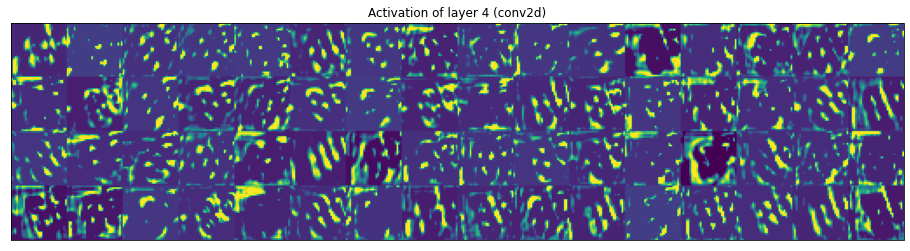

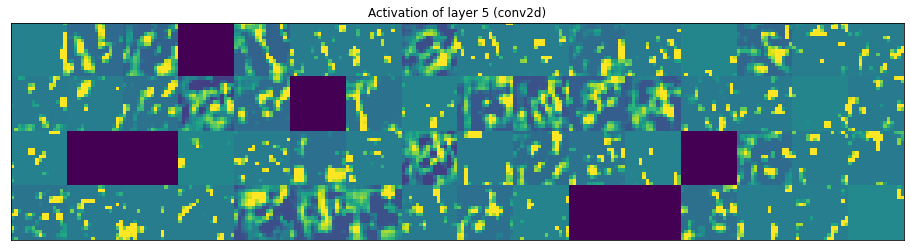

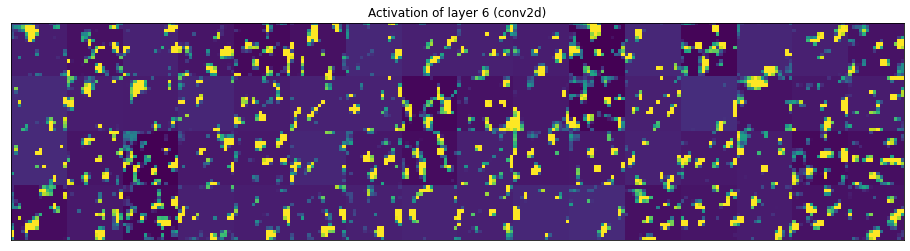

In [0]:
def plot_activations():
    layer_name_to_plot = 'conv2d'
    layers_to_plot = 6

    activations = activations_from_model(model_2_2, layer_name_to_plot)
    
    for i in range(layers_to_plot):
        plot_activations_help(activations, i, layer_name_to_plot)

def activations_from_model(model, layer_name = 'conv2d', index_example_test_set = 0):
    img_tensor = preprocessing(X_test)[index_example_test_set]
    img_tensor = np.expand_dims(img_tensor, axis=0)

    layer_outputs = [layer.output for layer in model.layers if layer_name in layer.name]
    activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
    activations = activation_model.predict(img_tensor)
    
    return activations

def plot_activations_help(activations, layer_index, layer_name, images_per_row=16):
    """ Modified version from the solutions of lab 6
    """
    start = layer_index
    end = layer_index+1

    for layer_activation in activations[start:end]:
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]

        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))

        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,
                                                 :, :,
                                                 col * images_per_row + row]
                # Post-process the feature to make it visually palatable
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image

        # Display the grid
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title("Activation of layer {} ({})".format(layer_index+1,layer_name))
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

    plt.show()

plot_activations()

In [0]:
answer_q_3_2 = """
               From the initial layers we can clearly see the the focus on the digit and
               the focus is on curvature of the outside of the 8-shape. Even in the 6th layer the 8-shape can still sort-of be seen.
               The model indeed learned something as it is focusing on edges of shape and not on the background.
               
               The convolutional net mainly focuses on the center of the image (and not 5 in the top-right corner).
               
               """
print("Answer is {} characters long".format(len(answer_q_3_2)))

Answer is 499 characters long


### Question 3.3: Visualizing activations (4 points)
* Again, select the first example from the test set, and the trained model_2_2.
* Implement a function `plot_activation_map()` that builds and shows a class activation map for your last convolutional layer that highlights what the model is paying attention to when classifying the example.
* If possible, superimpose the activation map over the image. If not, plot
them side by side. Implement a function 'plot_3_3' that returns the entire plot.

In [0]:
fig_size = 512 # Resulting figure is square, so fig_size * fig_size is resulting dimension

In [0]:
from tensorflow.keras import models
from tensorflow.keras import backend as K
import tensorflow as tf
import numpy as np
import cv2


def plot_activation_map():
    img_tensor = preprocessing(X_test)[0]
    img_tensor = np.expand_dims(img_tensor, axis=0)
    conv_layer = [layer for layer in model_2_2.layers if 'conv2d' in layer.name][-1]
    heatmap_model = models.Model([model_2_2.inputs], [conv_layer.output, model_2_2.output])

    with tf.GradientTape() as tape:
        conv_output, predictions = heatmap_model(img_tensor)
        loss = predictions[:, np.argmax(predictions[0])]
        grads = tape.gradient(loss, conv_output)
        pooled_grads = K.mean(grads, axis=(0, 1, 2))

    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_output), axis=-1)[0]

    # plot
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    heatmap = cv2.resize(heatmap, (fig_size, fig_size))

    plt.rcParams['figure.dpi'] = 120
    plt.matshow(heatmap)
    plt.title('Class activation map')
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
    return heatmap

# plot_activation_map()

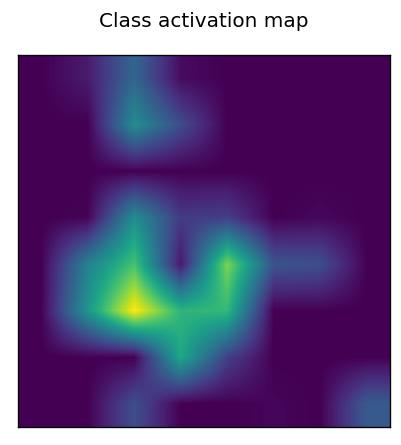

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

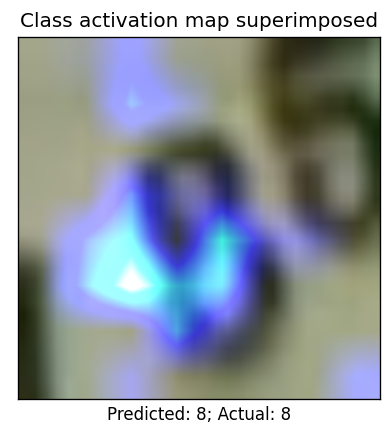

In [0]:
def plot_3_3():
    img_first_example = cv2.resize(X_test[0], (fig_size, fig_size))
    
    cam = plot_activation_map()
    cam = np.uint8(255 * cam)
    cam = cv2.applyColorMap(cam, cv2.COLORMAP_HOT)
    cam = np.float32(cam / 255)
    
    superimposed_img = cv2.addWeighted(img_first_example, 1, cam, 0.7, 0)

    plt.rcParams['figure.dpi'] = 120
    plt.imshow(superimposed_img)
    plt.title('Class activation map superimposed')

    plt.xlabel("Predicted: %s; Actual: %s" % ((y_pred[0]+1)%10, (y_test_int[0]+1)%10))

    plt.xticks([])
    plt.yticks([])
    return plt
    plt.show()
    
plot_3_3()

## Part 4. Transfer learning (10 points)
### Question 4.1 Fast feature extraction with VGG16 (5 points)
- Import the VGG16 model, pretrained on ImageNet. [See here](https://keras.io/applications/). Only import the convolutional part, not the dense layers.
- Implement a function 'build_model_4_1` that adds a dense layer to the convolutional base, and freezes the convolutional base. Consider unfreezing the last few convolutional layers and evaluate whether that works better.
- Train the resulting model on the *original* (colored) training data
- Evaluate the resulting model using 'run_evaluate'. Discuss the observed performance in 'answer_q_4_1'.

In [0]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
______________________________________________________________

Loading model from file
Success!
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)

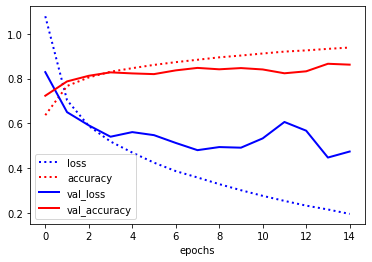

In [0]:
from tensorflow.keras import optimizers


def build_model_4_1():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    add_model = models.Sequential()

    unfreeze_layers = [
                       'block4_conv3',
                       'block5_conv1', 
                       'block5_conv2', 
                       'block5_conv3'
                        ]

    for layer in base_model.layers:
        if layer.name in unfreeze_layers:
            layer.trainable = True
        else:
            layer.trainable = False
        
    add_model.add(layers.Flatten(input_shape=base_model.output_shape[1:]))
    add_model.add(layers.Dense(128, activation='relu'))
    add_model.add(layers.Dense(10, activation='softmax'))

    model = models.Model(inputs=base_model.input, outputs=add_model(base_model.output))

    model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
            loss='categorical_crossentropy',
            metrics=['accuracy'])
    return model


run_evaluation("model_4_1", build_model_4_1, evaluation_split, base_dir, 
               train=False, epochs=15, batch_size=128)


In [0]:
# Check if trainable layers are actually set as planned
model_4_1_test = load_model_from_file(base_dir, "model_4_1")
for layer in model_4_1_test.layers:
    print (layer.trainable)

True
False
False
False
False
False
False
False
False
False
False
False
False
True
False
True
True
True
False
True


In [0]:
answer_q_4_1 = """
               Model performs horribly compared to 2.2 and 2.1.
               Those have been trained from scratch, while VGG16 was made for imagenet and not digit classification. 
               
               Therefore fine-tuning is needed; improves accuracy significantly.
               It is overfitting, however the validation accuracy is way higher than before.
               Unfreezing less layers gave less validation accuracy, while still overfitting.
               """
print("Answer is {} characters long".format(len(answer_q_4_1)))

Answer is 482 characters long


### Question 4.2 Embeddings and pipelines (5 points)
- Generate embeddings of the original images by running them through the trained convolutional part of model_4_1 (without the dense layer) and returning the output. Embed the training and test data and store them to disk using the helper functions below. Implement a function `store_embeddings` that loads model_4_1 and stores all necessary embeddings to file. Make sure to run it once so that the embeddings are stored (and submitted).
- Implement a function 'generate_pipeline' that returns an scikit-learn pipeline. You can use any non-deep learning technique (eg. SVMs, RFs,...), and preprocessing technique. You can do model selection using the validation set. 
- Implement a function 'evaluate_pipeline' that evaluates a given pipeline on a given training and test set. 
- Implement a function 'evaluation_4_2' that evaluates your pipeline on the embedded training and test set (loaded from file) and returns the accuracy. 
- Describe what you did and what you observed. Report the obtained accuracy score. Can you beat your best model thus far?

In [0]:
import pickle
import gzip

def store_embedding(X, name):  
    with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'wb') as file_pi:
        pickle.dump(X, file_pi)

def load_embedding(name):
    with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'rb') as file_pi:
        return pickle.load(file_pi)

In [0]:
from keras.applications.vgg16 import preprocess_input

def store_embeddings(X_train=X_train, X_test=X_test):
    """ Stores all necessary embeddings to file
    """
    # get model
    model_4_1 = load_model_from_file(base_dir, "model_4_1")

    # build model of convolutional base
    conv_base_layers = model_4_1.layers[:-1]
    conv_base_model = models.Sequential()
    for layer in conv_base_layers:
        conv_base_model.add(layer)
    
    # use build model to get features to embed
    train_features = conv_base_model.predict(X_train)
    test_features = conv_base_model.predict(X_test)

    # store features as embedding
    store_embedding(train_features, 'train')
    store_embedding(test_features, 'test')

Using TensorFlow backend.


In [0]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, QuantileTransformer, Normalizer, PowerTransformer

def generate_pipeline():
    """ Returns an sklearn pipeline.
    """
    # scaler = StandardScaler() # 87.6%
    # scaler = MaxAbsScaler() # 87.5%
    # scaler = QuantileTransformer()
    # scaler = PowerTransformer() # 87.3%
    normalize = Normalizer(norm='l2') #87.74% without scaler
    # clf = LogisticRegression(random_state=1)
    # clf = SGDClassifier(random_state=1)
    # clf = OneVsOneClassifier(svm.SVC(kernel='linear', random_state=1, max_iter=50), n_jobs=-1)
    # clf = OneVsOneClassifier(svm.SVC(kernel='rbf', random_state=1), n_jobs=-1) # 87.5% after long time and memory leak
    # clf = OneVsOneClassifier(RandomForestClassifier(random_state=1), n_jobs=-1)
    clf = OneVsOneClassifier(LogisticRegression(penalty='l2', solver='saga', random_state=1, n_jobs=-1), n_jobs=-1) # 87.3% -> 87.5% with scaling
    return Pipeline(steps=[('normalize', normalize),('clf', clf)])

def evaluate_pipeline(pipeline, X_train, y_train, X_test, y_test):
    """ Evaluates the given pipeline, trained on the given embedded training set and 
        evaluated on the supplied embedded test set. Returns the accuracy score.
    """
    pipeline.fit(X_train, y_train)
    return pipeline.score(X_test, y_test)


In [0]:
def evaluation_4_2(X_train, y_train, X_test, y_test):
    """ Runs 'evaluate_pipeline' with embedded versions of the input data 
    and returns the accuracy.
    """
    try: # load embeddings
        X_train_embedded = load_embedding('train')
        X_test_embedded = load_embedding('test')
    except FileNotFoundError: # when embeddings not present, compute and store them
        store_embeddings(X_train, X_test)
        X_train_embedded = load_embedding('train')
        X_test_embedded = load_embedding('test')

    nsamples_train, nx_train, ny_train, nz_train = X_train_embedded.shape
    X_train_red = X_train_embedded.reshape((nsamples_train,nx_train*ny_train*nz_train))
    y_train_red = np.argmax(y_train, axis=1)

    nsamples_test, nx_test, ny_test, nz_test = X_test_embedded.shape
    X_test_red = X_test_embedded.reshape((nsamples_test,nx_test*ny_test*nz_test))
    y_test_red = np.argmax(y_test, axis=1)
    pipeline = generate_pipeline()
    
    return evaluate_pipeline(pipeline, X_train_red, y_train_red, X_test_red, y_test_red)

In [0]:
eval_acc = evaluation_4_2(X_train, y_train, X_test, y_test)
print("Accuracy 4.2: {}".format(eval_acc))

Accuracy 4.2: 0.8772786786181891


In [0]:
answer_q_4_2 = """
                Feature extraction as embedding.
                Non-DL techniques on itself were very slow (SVC, RF).
                Therefore different multilabel classifier; OneVsOne is faster than OneVsRest as sample size is quite high.
                LogisticRegression is both fast and performs well; slight improved accuracy by using normalizer.
                Not best model as 4.1 already didn't have 87%+ val. accuracy, so 87.7% from these features is reasonably good.
               """
print("Pipeline:",generate_pipeline())
print("Answer is {} characters long".format(len(answer_q_4_2)))

Pipeline: Pipeline(memory=None,
         steps=[('normalize', Normalizer(copy=True, norm='l2')),
                ('clf',
                 OneVsOneClassifier(estimator=LogisticRegression(C=1.0,
                                                                 class_weight=None,
                                                                 dual=False,
                                                                 fit_intercept=True,
                                                                 intercept_scaling=1,
                                                                 l1_ratio=None,
                                                                 max_iter=100,
                                                                 multi_class='auto',
                                                                 n_jobs=-1,
                                                                 penalty='l2',
                                                                 random_stat